## 1. Introduction to Image Segmentation
Image segmentation is a fundamental process in computer vision that involves partitioning a digital image into multiple subgroups or segments. The primary goal is to simplify or change the representation of an image into something that is more meaningful and easier to analyze. Segmentation is typically used to locate objects and boundaries in images, effectively separating the foreground (the object of interest) from the background.

## 2. The Theory of Thresholding
Thresholding is the simplest and most common method of image segmentation. It operates on grayscale images, evaluating the intensity value of each individual pixel. If a pixel's intensity meets a certain condition relative to a predetermined threshold value, it is classified as belonging to the object; otherwise, it is classified as the background.

### Mathematical Foundation
Mathematically, thresholding transforms a grayscale image into a binary image. Let $f(x,y)$ represent the intensity value of a pixel at coordinates $(x,y)$, and let $T$ be the threshold value. The resulting binary image, $g(x,y)$, is computed as follows:

$$g(x,y) = \begin{cases} 255 & \text{if } f(x,y) > T \\ 0 & \text{if } f(x,y) \le T \end{cases}$$

In this equation, **255** represents a white pixel (the foreground), and **0** represents a black pixel (the background).

## 3. Global vs. Adaptive Thresholding
This project explores and compares two distinct approaches to determining the threshold value $T$:

* **Global Thresholding:** A single, constant threshold value $T$ is calculated and applied to the entire image. This approach, which includes algorithms like Otsu's and the Triangle method, works exceptionally well in controlled environments with uniform lighting. However, it often fails when an image has uneven illumination or heavy shadows.
* **Adaptive (Local) Thresholding:** Instead of a single global value, the threshold $T$ is dynamically calculated for smaller, localized regions (neighborhoods) of the image. By accounting for the local spatial context using methods like Gaussian or Mean weighted calculations, adaptive thresholding successfully isolates objects even when lighting conditions vary drastically across the scene.

## 4. Project Objectives
In this notebook, we will implement these segmentation techniques using Python, OpenCV, NumPy, and Matplotlib. By applying both global and adaptive methods to our sample dataset, we aim to visually compare their outputs and formally discuss their respective strengths, limitations, and real-world applications.

In [ ]:
# ========================================
# TASK 1: INTRODUCTION, THEORY & SETUP
# Assigned to: Kwabena Nyamekye Mawuli
# ========================================
# INSTRUCTIONS FOR MEMBER 1:

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import os
import glob

# Mount drive to access the dataset
drive.mount('/content/drive')

# Path to the dataset in the My Drive
IMAGE_DIR = "/content/drive/MyDrive/DCIT_407_Sample_images "

# Dictionary to hold all our grayscale images (Filename -> Image Array)
dataset_images = {}

# Check if directory exists, then load all images
if os.path.exists(IMAGE_DIR):
    # Find all files in the folder
    image_paths = glob.glob(os.path.join(IMAGE_DIR, '*.*'))

    for path in image_paths:
        # Extract just the file name (e.g., 'image1.jpg')
        filename = os.path.basename(path)

        # Read the image directly in grayscale
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

        # Ensure the image was read correctly before adding to the dictionary
        if img is not None:
            dataset_images[filename] = img

    print(f"✅ Successfully loaded {len(dataset_images)} images into the 'dataset_images' dictionary!")
    print("\nAvailable images to test:")
    for name in dataset_images.keys():
        print(f" - {name}")
else:
    print(f"❌ Error: Could not find the folder at {IMAGE_DIR}. Please check the path!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Successfully loaded 17 images into the 'dataset_images' dictionary!

Available images to test:
 - birds.jpg
 - Plus-FT.jpg
 - brain_MR.jpg
 - city_hall.jpg
 - face2.jpg
 - face1.jpg
 - diag-stripes.png
 - curved_lane.jpg
 - R+M-surf.jpg
 - city_hall_zoom.png
 - multi_faces.jpg
 - stripes.jpg
 - round_farms.jpg
 - pink_solid.jpg
 - sunflower.jpg
 - sinx-sin2y-sinx+y.jpg
 - phone.jpg


## Global Thresholding: Otsu's Method

**Otsu's Method** is one of the most widely used and effective algorithms for automatic global thresholding. Unlike manual thresholding where a user guesses a specific cutoff value, Otsu's algorithm mathematically calculates the optimal single threshold value to separate the foreground from the background across the entire image.

### How the Algorithm Works
[Image of a bimodal histogram demonstrating Otsu's thresholding]

Otsu's method assumes that the image contains two classes of pixels (foreground and background) and that the image's histogram is **bimodal** (having two distinct peaks). The algorithm iterates through all possible threshold values (from 0 to 255) and searches for the specific value that makes the two classes as distinct as possible.

It achieves this by finding the threshold $T$ that minimizes the **intra-class variance** (the spread of pixel values *within* each class).

### Mathematical Foundation

Mathematically, the algorithm minimizes the weighted sum of variances of the two classes. The within-class variance $\sigma_w^2(T)$ at a given threshold $T$ is defined by the following formula:

$$\sigma_w^2(T) = \omega_0(T)\sigma_0^2(T) + \omega_1(T)\sigma_1^2(T)$$

Where:
* $\omega_0(T)$ and $\omega_1(T)$ are the probabilities of a pixel belonging to class 0 (background) or class 1 (foreground) at threshold $T$.
* $\sigma_0^2(T)$ and $\sigma_1^2(T)$ are the actual variances of the pixel intensities within those respective classes.

By minimizing this intra-class variance, Otsu's method essentially guarantees that the pixels

Applying Otsu's Global Thresholding...

Optimal threshold for brain_MR.jpg: 36.0
Optimal threshold for birds.jpg: 122.0
Optimal threshold for phone.jpg: 103.0
Optimal threshold for city_hall.jpg: 124.0


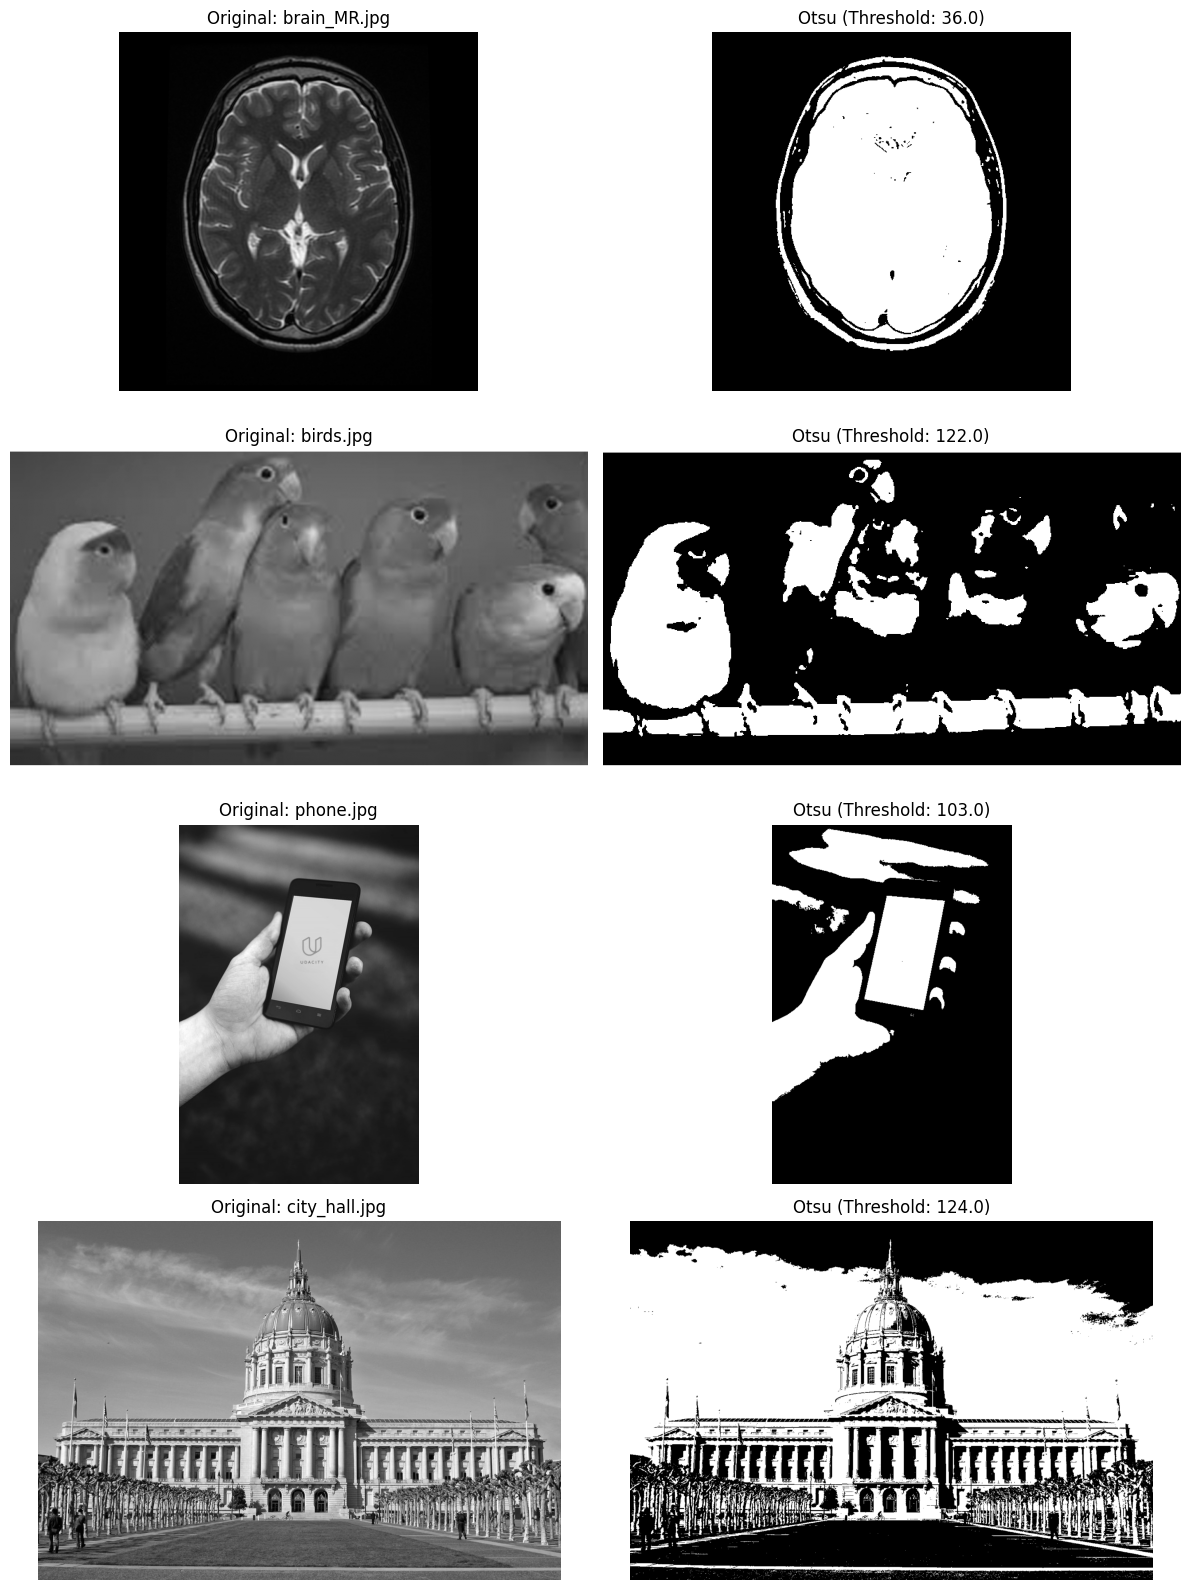

In [ ]:
# ========================================
# TASK 2: GLOBAL THRESHOLDING (OTSU)
# Assigned to: Koranteng Edward Sefah
# ========================================
# INSTRUCTIONS FOR MEMBER 2:
# Include the specific mathematical formula Otsu uses to minimize intra-class variance.

# Apply Otsu's thresholding
# Select 4 varied images from our dataset dictionary
selected_images = ['brain_MR.jpg', 'birds.jpg', 'phone.jpg', 'city_hall.jpg']

# Set up a Matplotlib figure (4 rows, 2 columns) for side-by-side comparison
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))

print("Applying Otsu's Global Thresholding...\n")

for i, img_name in enumerate(selected_images):
    # Fetch the pre-loaded grayscale image from Task 1
    test_image = dataset_images[img_name]

    # Apply Otsu's thresholding
    # cv2.THRESH_OTSU mathematically calculates the best single threshold value
    ret_otsu, thresh_otsu = cv2.threshold(test_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    print(f"Optimal threshold for {img_name}: {ret_otsu}")

    # Plot Original Image (Left Column)
    axes[i, 0].imshow(test_image, cmap='gray')
    axes[i, 0].set_title(f'Original: {img_name}')
    axes[i, 0].axis('off')

    # Plot Otsu Result (Right Column)
    axes[i, 1].imshow(thresh_otsu, cmap='gray')
    axes[i, 1].set_title(f'Otsu (Threshold: {ret_otsu})')
    axes[i, 1].axis('off')

# Adjust layout so titles don't overlap and display the plot
plt.tight_layout()
plt.show()

## Global Thresholding: The Triangle Method

The **Triangle Method** is a geometric approach to global image thresholding. Unlike Otsu's method, which mathematically searches for variance between two distinct peaks (a bimodal histogram), the Triangle method is specifically designed for images with a **unimodal histogram**—meaning the image is dominated by one massive peak (usually a large background) with a long, flat tail (a small object of interest).

### How the Algorithm Works



The algorithm determines the optimal threshold value by analyzing the geometric shape of the image's histogram through these specific steps:

1. **Find the Peak:** It first locates the absolute maximum peak in the histogram (the most frequent pixel intensity).
2. **Draw a Line:** It draws a straight line from the top of this maximum peak down to the farthest non-zero end of the histogram (the tail).
3. **Maximize Distance:** It then calculates the perpendicular distance from this drawn line to every individual point on the histogram curve.
4. **Set the Threshold:** The optimal global threshold value, $T$, is selected at the exact point on the histogram where this perpendicular distance is at its absolute maximum.

### Strengths and Use Cases
Because it relies on this specific geometric shape rather than statistical variance, the Triangle method is highly effective for segmenting extremely small foreground objects against vast backgrounds. It is frequently used in medical imaging (like isolating a single bright cell on a large, dark microscope slide) or in industrial quality control (like detecting a tiny, bright defect on a large, dark piece of metal).

Applying Triangle Global Thresholding...

Optimal threshold for brain_MR.jpg: 2.0
Optimal threshold for birds.jpg: 123.0
Optimal threshold for phone.jpg: 62.0
Optimal threshold for city_hall.jpg: 120.0


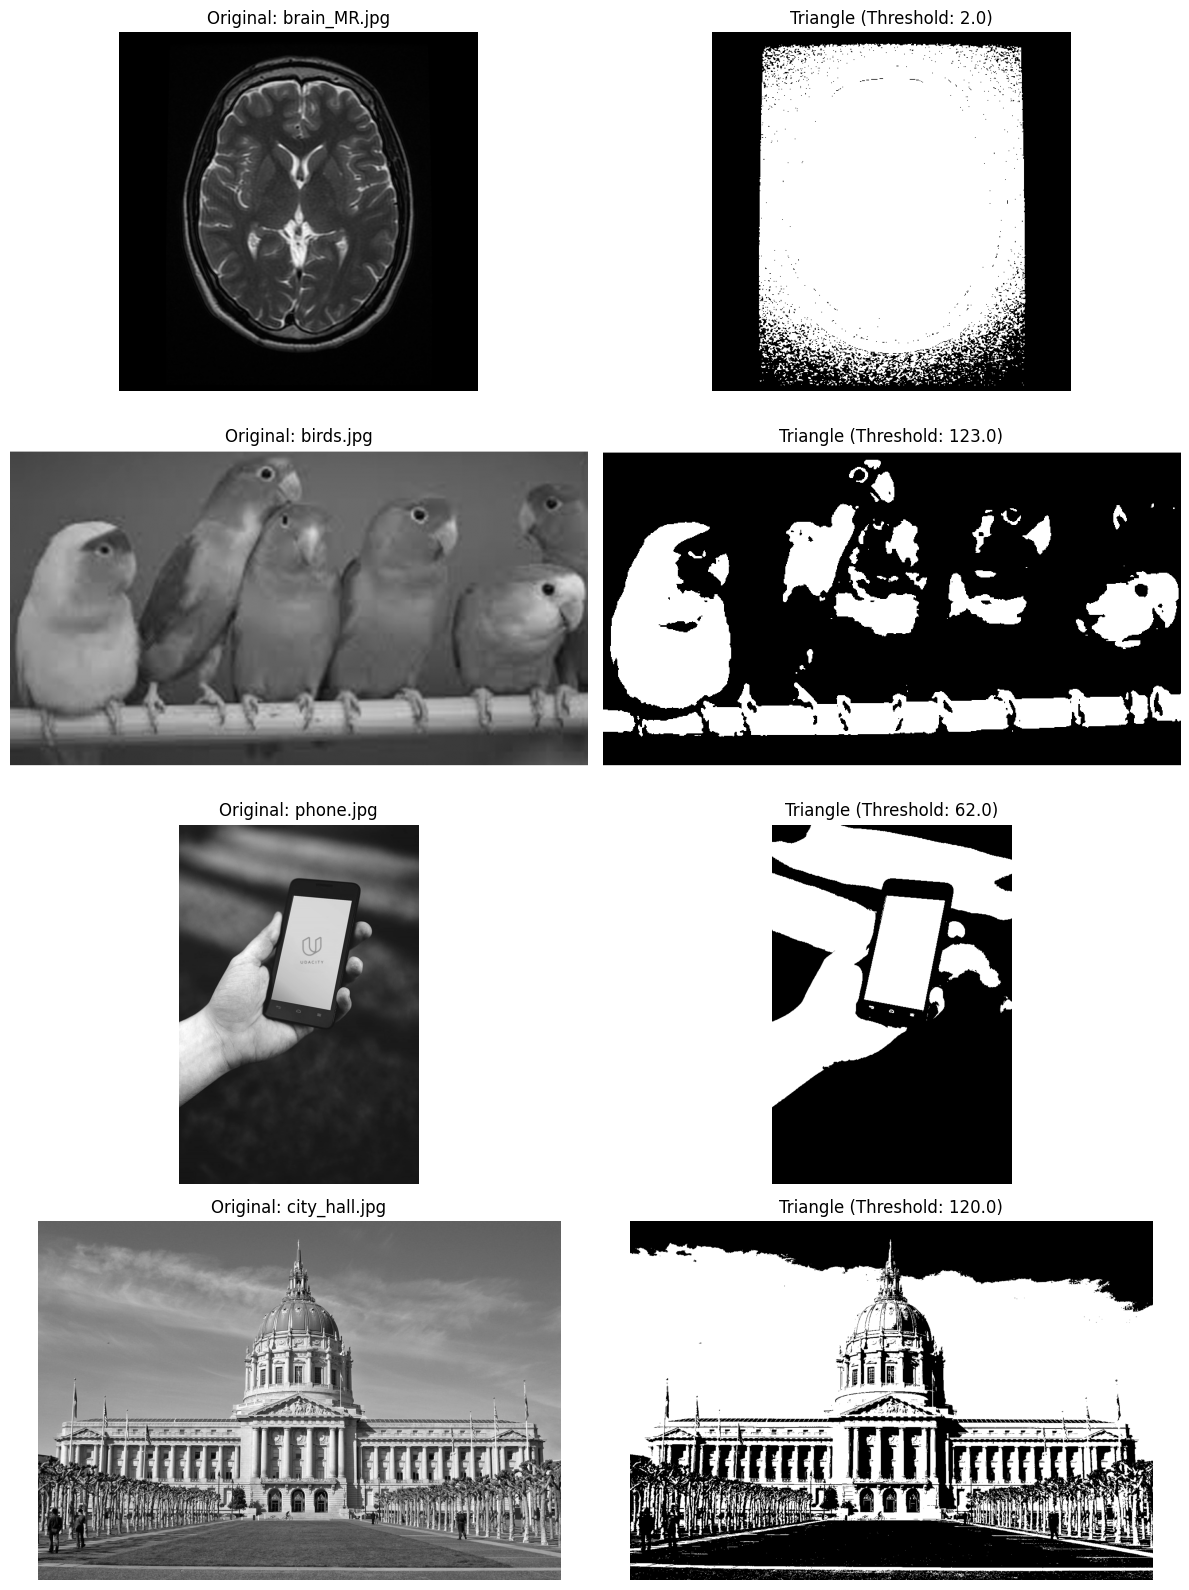

In [ ]:
# ========================================
# TASK 3: GLOBAL THRESHOLDING (TRIANGLE)
# Assigned to: Kwabena Abu Owusu-Darko
# ========================================
# Using the same 4 varied images from our dataset dictionary
selected_images = ['brain_MR.jpg', 'birds.jpg', 'phone.jpg', 'city_hall.jpg']

# Set up a Matplotlib figure (4 rows, 2 columns) for side-by-side comparison
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))

print("Applying Triangle Global Thresholding...\n")

for i, img_name in enumerate(selected_images):
    # Fetch the pre-loaded grayscale image from Task 1
    test_image = dataset_images[img_name]

    # Apply Triangle thresholding
    # cv2.THRESH_TRIANGLE is excellent for images with unimodal histograms
    ret_triangle, thresh_triangle = cv2.threshold(test_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_TRIANGLE)

    print(f"Optimal threshold for {img_name}: {ret_triangle}")

    # Plot Original Image (Left Column)
    axes[i, 0].imshow(test_image, cmap='gray')
    axes[i, 0].set_title(f'Original: {img_name}')
    axes[i, 0].axis('off')

    # Plot Triangle Result (Right Column)
    axes[i, 1].imshow(thresh_triangle, cmap='gray')
    axes[i, 1].set_title(f'Triangle (Threshold: {ret_triangle})')
    axes[i, 1].axis('off')

# Adjust layout and display
plt.tight_layout()
plt.show()

## Adaptive Thresholding: The Gaussian Method

Unlike global thresholding methods (such as Otsu's or the Triangle method) which apply a single, rigid threshold value across an entire image, **Adaptive Thresholding** calculates a unique threshold dynamically for different regions. This makes it highly effective for real-world images that suffer from uneven lighting, heavy shadows, or screen glare.

### The Gaussian-Weighted Sum

In the **Gaussian Adaptive Thresholding** method, the algorithm examines a small, localized region—or "neighborhood"—around each individual pixel (for example, an 11x11 pixel block).

Instead of simply calculating a flat average of the pixel values in this block, it calculates a **Gaussian-weighted sum**.

This means it applies a 2D Gaussian curve to the local region, giving the pixels closest to the center significantly more "weight" or influence in the calculation than the pixels further away near the edges. A constant value, $C$, is then subtracted from this weighted sum to fine-tune the threshold and filter out baseline noise.

By weighting the local neighborhood in this manner, the Gaussian method respects the natural gradient of the lighting and produces much smoother, cleaner edges than an unweighted average.

Applying Gaussian Adaptive Thresholding...



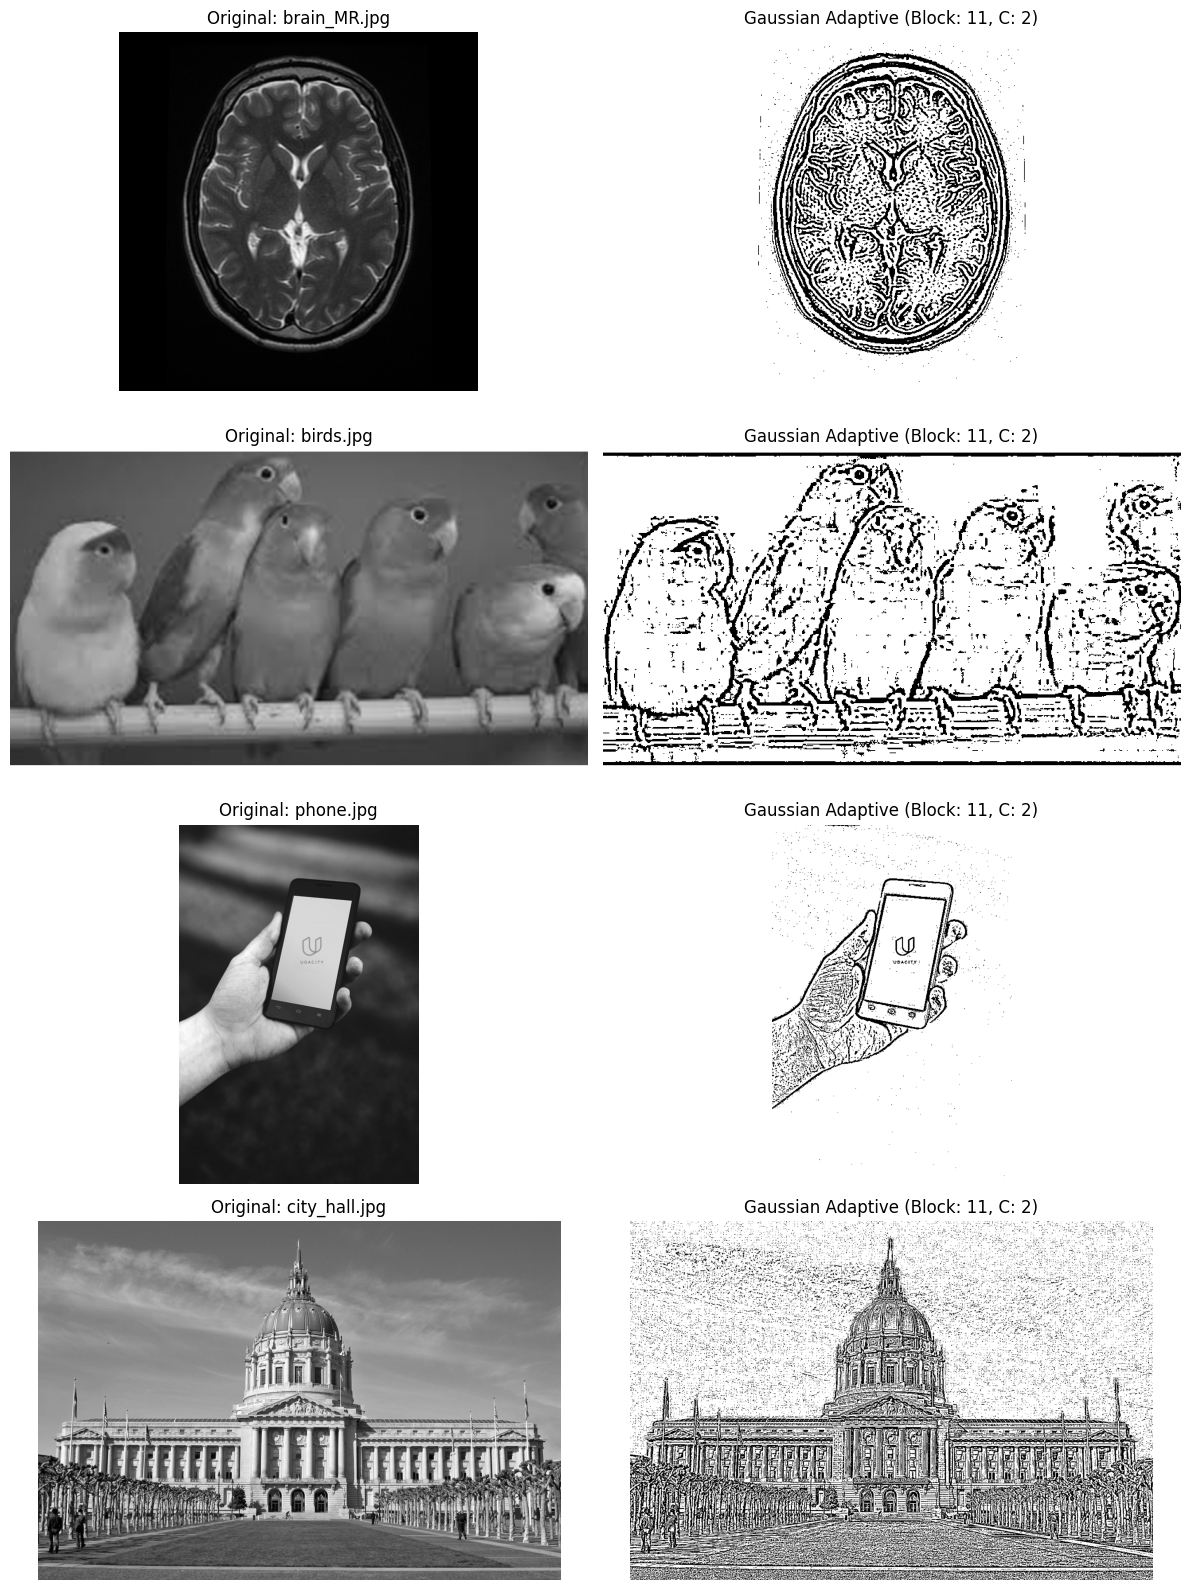

In [ ]:
# ========================================
# TASK 4: ADAPTIVE THRESHOLDING (GAUSSIAN)
# Assigned to: Caleb Setordzi
# ========================================
# We are using the exact same 4 images to ensure a fair comparison with the global methods.

# Using the same 4 varied images from our dataset dictionary
selected_images = ['brain_MR.jpg', 'birds.jpg', 'phone.jpg', 'city_hall.jpg']

# Set up a Matplotlib figure (4 rows, 2 columns) for side-by-side comparison
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))

print("Applying Gaussian Adaptive Thresholding...\n")

# Parameters for Adaptive Thresholding
# block_size: Size of a pixel neighborhood that is used to calculate a threshold value (must be odd)
# C: Constant subtracted from the mean or weighted mean
block_size = 11
C = 2

for i, img_name in enumerate(selected_images):
    # Fetch the pre-loaded grayscale image from Task 1
    test_image = dataset_images[img_name]

    # Apply Gaussian Adaptive Thresholding
    thresh_gaussian = cv2.adaptiveThreshold(
        test_image,
        255,                                  # Maximum value assigned to pixels exceeding the threshold
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,       # Gaussian weighting for the local neighborhood
        cv2.THRESH_BINARY,                    # Type of thresholding
        block_size,                           # Neighborhood size (11x11)
        C                                     # Constant to fine-tune the noise floor
    )

    # Plot Original Image (Left Column)
    axes[i, 0].imshow(test_image, cmap='gray')
    axes[i, 0].set_title(f'Original: {img_name}')
    axes[i, 0].axis('off')

    # Plot Gaussian Adaptive Result (Right Column)
    axes[i, 1].imshow(thresh_gaussian, cmap='gray')
    axes[i, 1].set_title(f'Gaussian Adaptive (Block: {block_size}, C: {C})')
    axes[i, 1].axis('off')

# Adjust layout and display
plt.tight_layout()
plt.show()

## Adaptive Thresholding: The Mean Method

**Mean Adaptive Thresholding** is a local segmentation technique that dynamically calculates a unique threshold value for every individual pixel in an image. Instead of using a single global value (like Otsu's or the Triangle method), it looks at a localized grid—or "neighborhood"—around each pixel (e.g., an 11x11 block).

The threshold value for the center pixel is determined by calculating the simple arithmetic mean (average) of all the pixel intensities within that local block, minus a tunable constant $C$ (used to fine-tune the noise floor).

### Mean vs. Gaussian Adaptive Thresholding

While both the Mean and Gaussian methods adapt to uneven lighting conditions (such as shadows or screen glare) by analyzing local neighborhoods, the mathematical way they calculate the local threshold is fundamentally different:

* **Mean Method (Unweighted Average):** This method treats every single pixel in the local neighborhood equally. It calculates a simple, flat average. Because every pixel has the exact same influence, this method is computationally fast and produces sharp boundaries. However, it can sometimes result in "blocky" edges or slightly noisier backgrounds.
* **Gaussian Method (Weighted Curve):** [Image illustrating a 2D Gaussian weight distribution matrix] Instead of a simple average, this method applies a Gaussian function (a 2D bell curve) to the neighborhood. Pixels closer to the center of the block are given significantly more weight (influence) than pixels near the outer edges. This weighted approach generally yields smoother, more natural-looking edges and suppresses phantom noise better than the basic mean calculation.

Applying Mean Adaptive Thresholding...



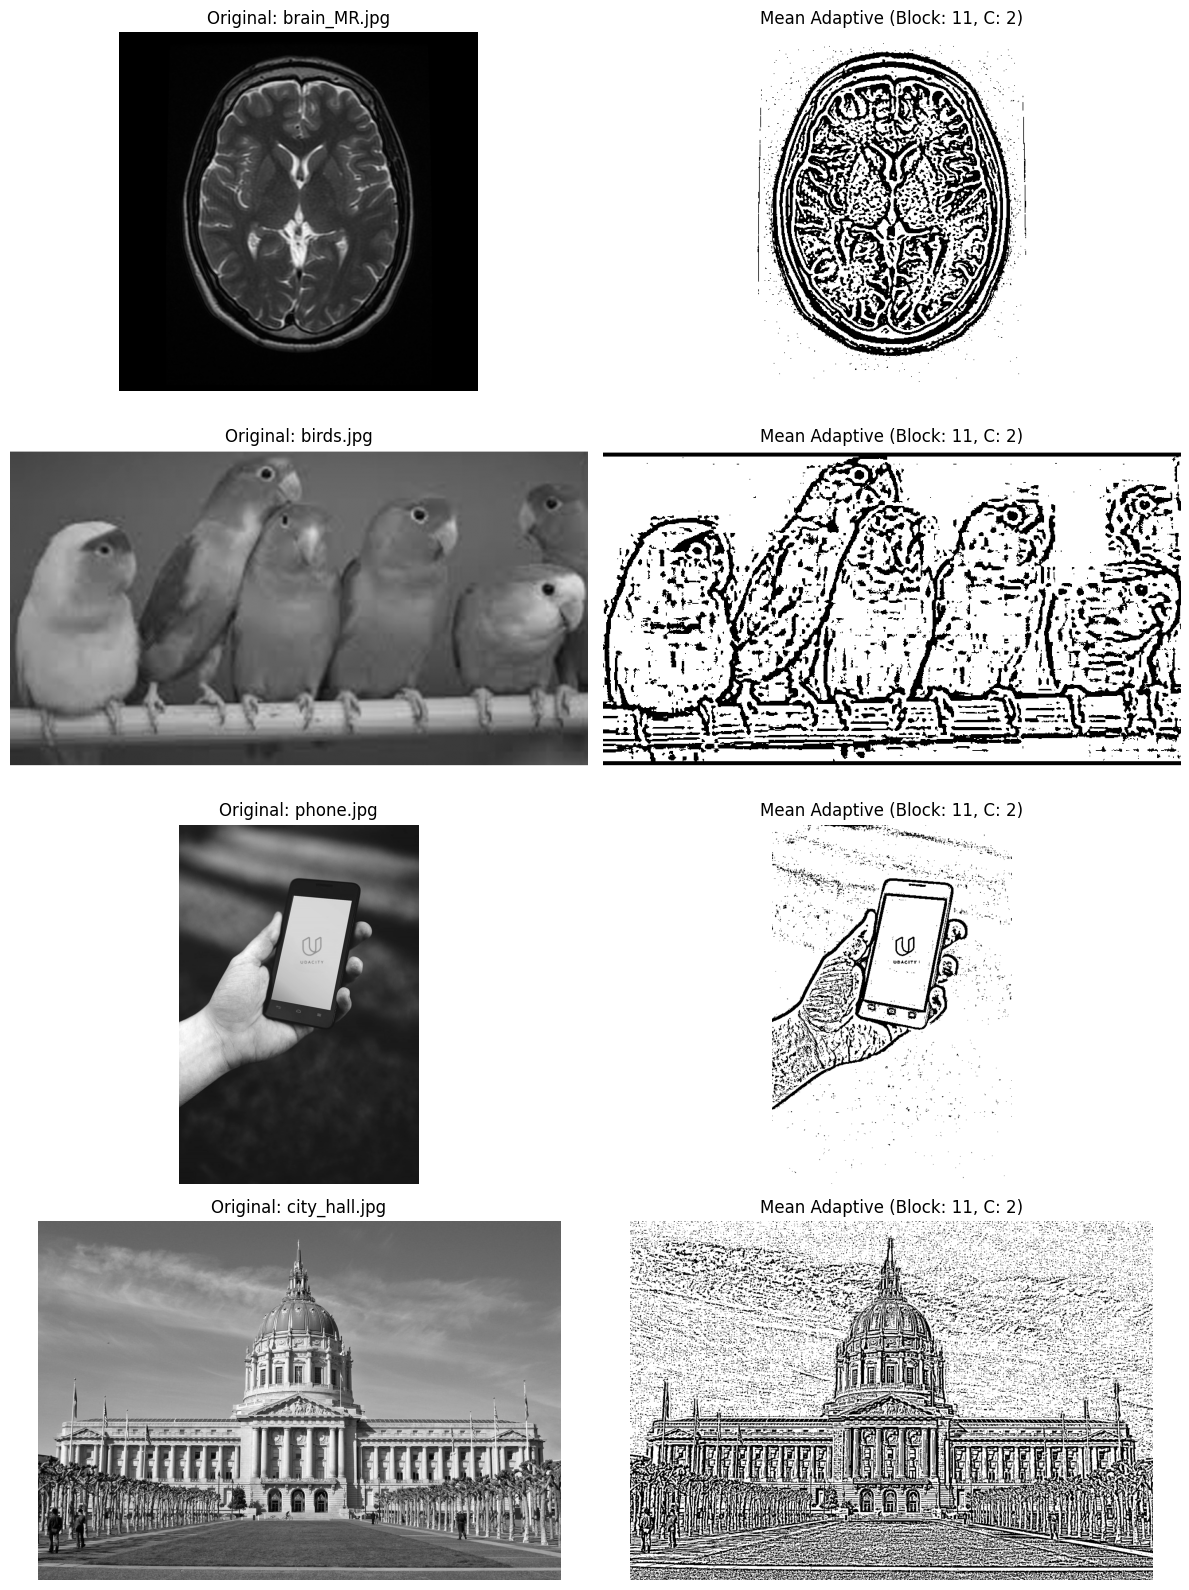

In [ ]:
# ========================================
# TASK 5: ADAPTIVE THRESHOLDING (MEAN)
# Assigned to: Emmanuel Akpalu
# ========================================
# INSTRUCTIONS FOR MEMBER 5:
# We are using the exact same 4 images to ensure a fair comparison.

# Using the same 4 varied images from our dataset dictionary
selected_images = ['brain_MR.jpg', 'birds.jpg', 'phone.jpg', 'city_hall.jpg']

# Set up a Matplotlib figure (4 rows, 2 columns) for side-by-side comparison
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))

print("Applying Mean Adaptive Thresholding...\n")

# Parameters for Adaptive Thresholding
# block_size: Size of a pixel neighborhood that is used to calculate a threshold value (must be odd)
# C: Constant subtracted from the mean
block_size = 11
C = 2

for i, img_name in enumerate(selected_images):
    # Fetch the pre-loaded grayscale image from Task 1
    test_image = dataset_images[img_name]

    # Apply Mean Adaptive Thresholding
    thresh_mean = cv2.adaptiveThreshold(
        test_image,
        255,                                  # Maximum value assigned to pixels exceeding the threshold
        cv2.ADAPTIVE_THRESH_MEAN_C,           # Simple mean average for the local neighborhood
        cv2.THRESH_BINARY,                    # Type of thresholding
        block_size,                           # Neighborhood size (11x11)
        C                                     # Constant to fine-tune the noise floor
    )

    # Plot Original Image (Left Column)
    axes[i, 0].imshow(test_image, cmap='gray')
    axes[i, 0].set_title(f'Original: {img_name}')
    axes[i, 0].axis('off')

    # Plot Mean Adaptive Result (Right Column)
    axes[i, 1].imshow(thresh_mean, cmap='gray')
    axes[i, 1].set_title(f'Mean Adaptive (Block: {block_size}, C: {C})')
    axes[i, 1].axis('off')

# Adjust layout and display
plt.tight_layout()
plt.show()

Generating Master Comparison Grid...



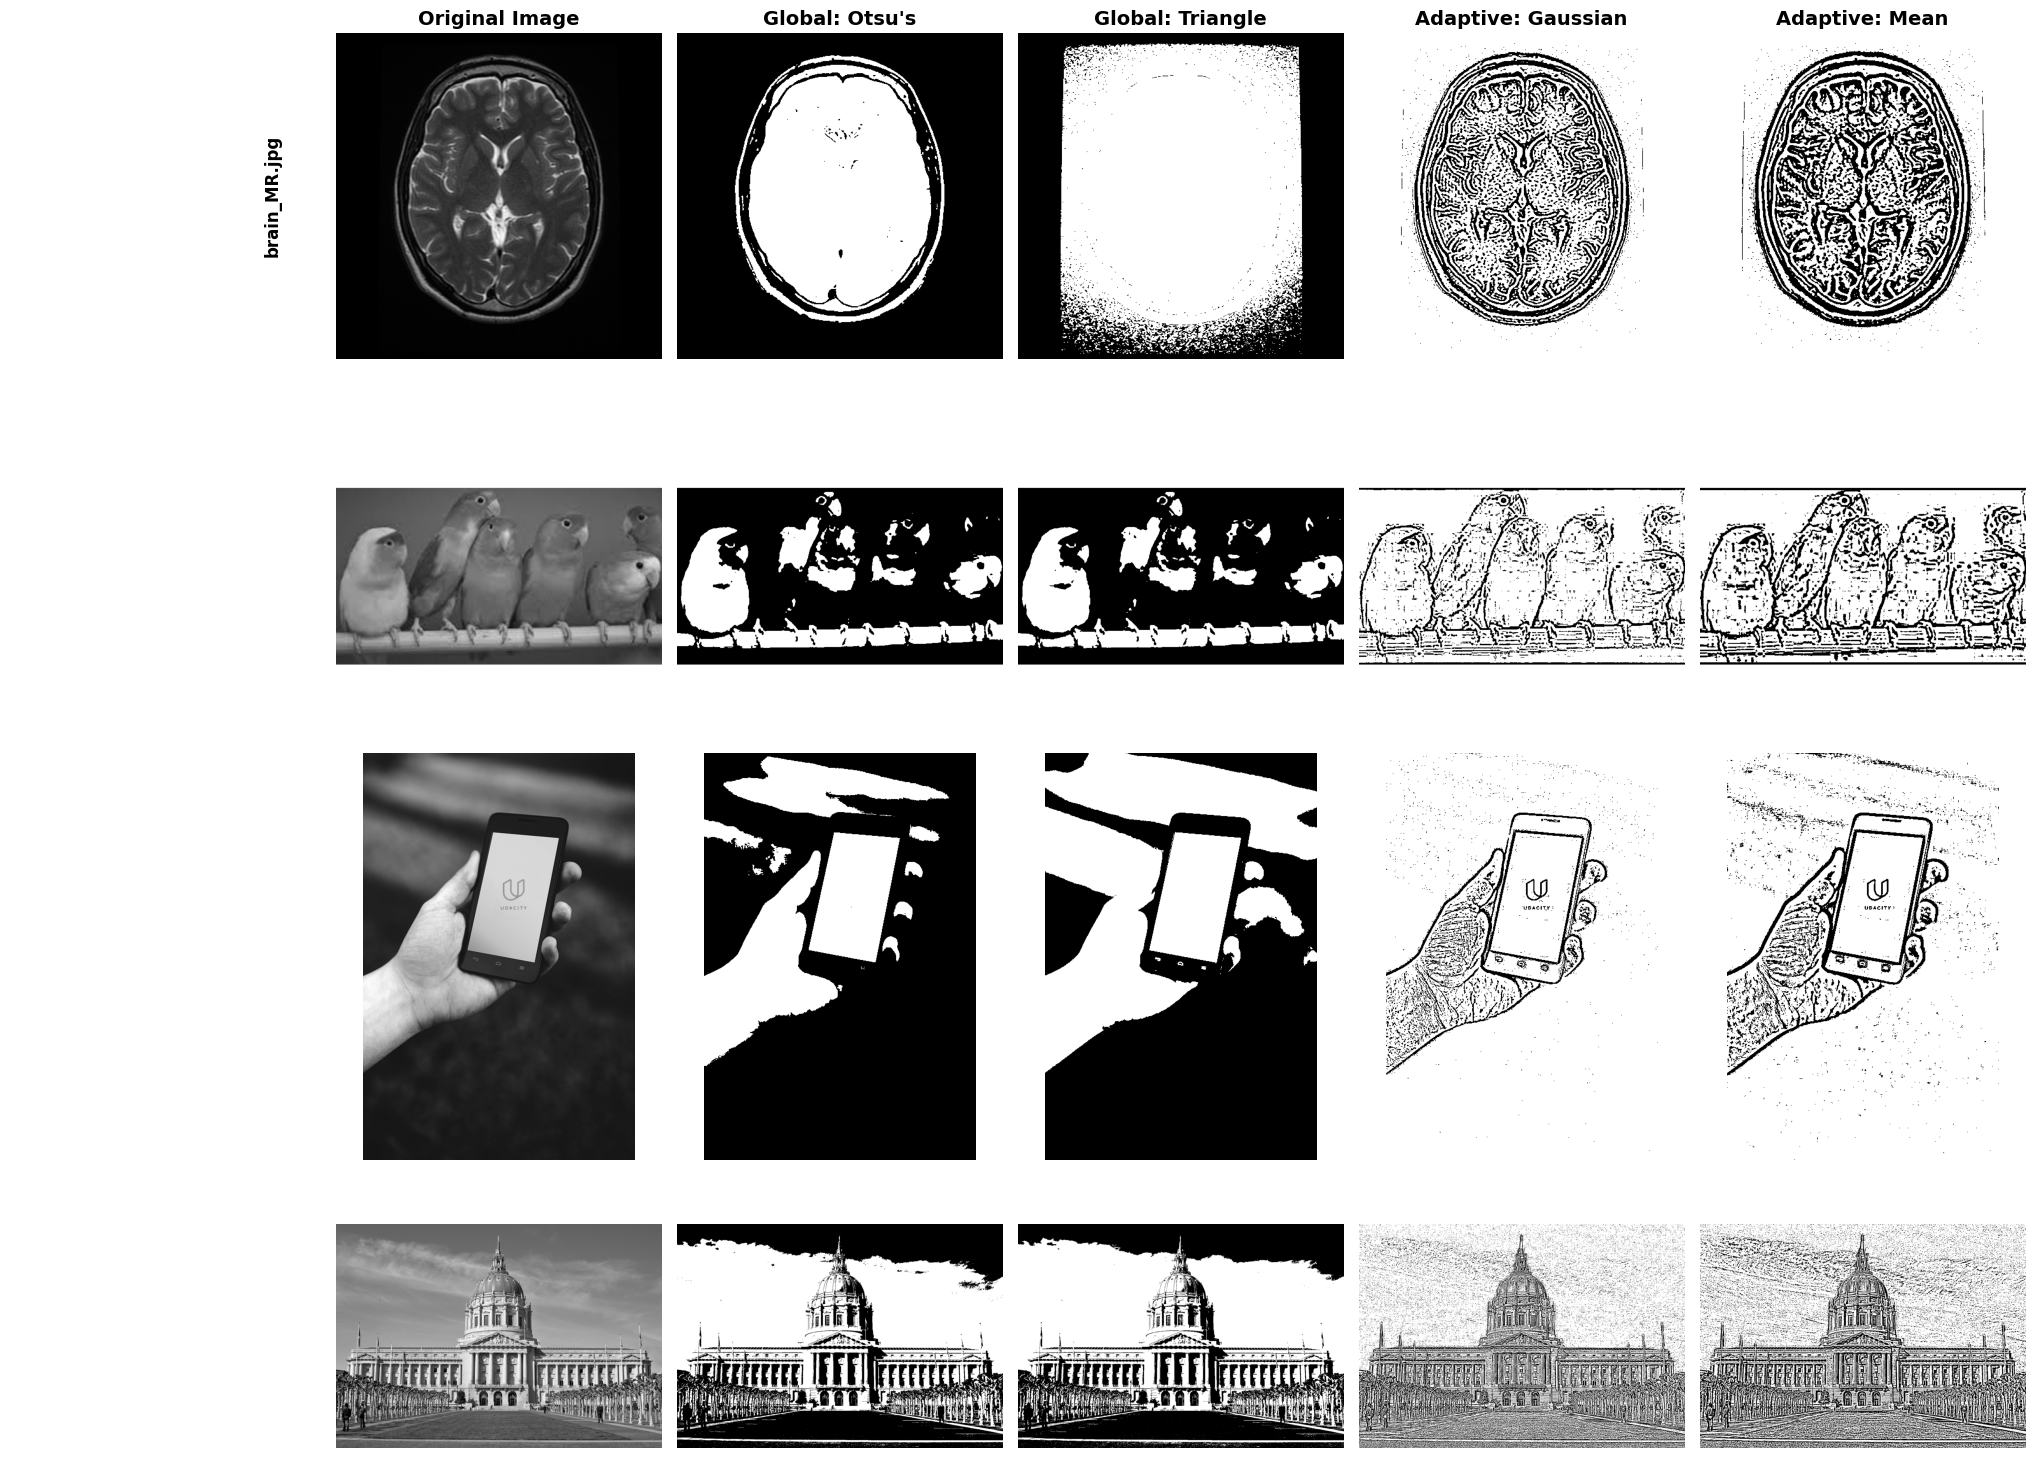

In [ ]:
# ========================================
# TASK 6: RESULTS VISUALIZATION (MASTER GRID)
# Assigned to: Emmanuel Donkor
# ========================================
# This code will re-apply all 4 methods to our 4 test images and
#    plot them in a massive 4x5 grid so we can compare them side-by-side.

# Using the exact same 4 varied images
selected_images = ['brain_MR.jpg', 'birds.jpg', 'phone.jpg', 'city_hall.jpg']

# Set up a large Matplotlib figure (4 rows, 5 columns)
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))

print("Generating Master Comparison Grid...\n")

for i, img_name in enumerate(selected_images):
    # Fetch the pre-loaded grayscale image
    test_image = dataset_images[img_name]

    # 1. Recompute Global Thresholds
    _, thresh_otsu = cv2.threshold(test_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    _, thresh_triangle = cv2.threshold(test_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_TRIANGLE)

    # 2. Recompute Adaptive Thresholds (using block_size=11, C=2)
    thresh_gaussian = cv2.adaptiveThreshold(test_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    thresh_mean = cv2.adaptiveThreshold(test_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

    # 3. Plot Original (Column 0)
    axes[i, 0].imshow(test_image, cmap='gray')
    axes[i, 0].axis('off')
    if i == 0: axes[i, 0].set_title('Original Image', fontsize=14, fontweight='bold')

    # 4. Plot Otsu (Column 1)
    axes[i, 1].imshow(thresh_otsu, cmap='gray')
    axes[i, 1].axis('off')
    if i == 0: axes[i, 1].set_title("Global: Otsu's", fontsize=14, fontweight='bold')

    # 5. Plot Triangle (Column 2)
    axes[i, 2].imshow(thresh_triangle, cmap='gray')
    axes[i, 2].axis('off')
    if i == 0: axes[i, 2].set_title('Global: Triangle', fontsize=14, fontweight='bold')

    # 6. Plot Adaptive Gaussian (Column 3)
    axes[i, 3].imshow(thresh_gaussian, cmap='gray')
    axes[i, 3].axis('off')
    if i == 0: axes[i, 3].set_title('Adaptive: Gaussian', fontsize=14, fontweight='bold')

    # 7. Plot Adaptive Mean (Column 4)
    axes[i, 4].imshow(thresh_mean, cmap='gray')
    axes[i, 4].axis('off')
    if i == 0: axes[i, 4].set_title('Adaptive: Mean', fontsize=14, fontweight='bold')

# Add a label to the side of each row to indicate which image is being tested
for ax, row_title in zip(axes[:,0], selected_images):
    ax.annotate(row_title, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 5, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size=12, ha='right', va='center', rotation=90, fontweight='bold')

plt.tight_layout()
plt.show()

## 4. Discussion and Analysis

Based on the master comparison grid generated in the previous section, we can draw clear distinctions between how global and adaptive thresholding techniques handle different spatial and lighting conditions.

### Analysis of Global Thresholding (Otsu & Triangle)
Global thresholding computes a single intensity value to separate the foreground from the background across the entire image.
* **Strengths:** In images with relatively uniform lighting and a clear contrast between the object and the background (such as `brain_MR.jpg` or `birds.jpg`), global methods—particularly Otsu's—perform exceptionally well. They cleanly separate the main subjects and are computationally fast.
* **Limitations:** Global methods mathematically fail when introduced to uneven illumination or glare.  For example, in `phone.jpg`, the screen glare causes the global threshold to incorrectly classify large portions of the dark text as background, completely erasing the information in the brighter areas of the screen.

### Analysis of Adaptive Thresholding (Gaussian & Mean)
[Image comparing global and adaptive thresholding on text with uneven lighting]
Adaptive thresholding dynamically calculates a different threshold for small, localized regions (e.g., an 11x11 pixel block).
* **Strengths:** These methods excel in real-world scenarios with varying illumination.  In `phone.jpg`, the adaptive methods easily ignore the sweeping glare across the screen and successfully extract the text because the threshold is calculated relative to the immediate surrounding pixels, not the entire image. Similarly, they capture finer architectural details in the shadowed areas of `city_hall.jpg`.
* **Limitations:** Because the algorithm forces a separation in every local block, it tends to amplify noise in completely flat, uniform areas of the background (often creating a "static" effect).  Furthermore, the Mean method tends to produce slightly sharper but noisier edges, whereas the Gaussian weighted method produces smoother, more aesthetically pleasing boundaries.

In [ ]:
# ========================================
# TASK 7: DISCUSSION & ANALYSIS
# Assigned to: Isabel Nana Afia Kwarteng
# ========================================

## 5. Real-World Applications

The strengths and limitations observed in our results dictate how these specific image segmentation techniques are applied in the real world:

1.  **Optical Character Recognition (OCR) and Document Digitization:** * **Application:** Scanning old historical documents, reading license plates, or extracting text from photos (like our `phone.jpg` example).
    * **Method Used:** Adaptive thresholding is heavily relied upon here because physical documents almost always have shadows, creases, or uneven lighting from the camera flash or scanner bed.
2.  **Medical Image Analysis:**
    * **Application:** Segmenting tumors, isolating bone structures in X-rays, or analyzing MRI scans (like our `brain_MR.jpg` example).
    * **Method Used:** Global methods like Otsu's or entropy-based thresholding are often preferred when the imaging environment is highly controlled, lighting is uniform, and minimizing false-positive "noise" artifacts is critical for diagnosis.
3.  **Automated Industrial Inspection:**
    * **Application:** Detecting microscopic defects on a manufacturing assembly line (e.g., finding a tiny scratch on a large metal sheet).
    * **Method Used:** The Triangle method is frequently utilized here because it is mathematically designed to detect very small foreground objects against vast backgrounds.

## 6. Conclusion

In this project, we successfully implemented and compared global and adaptive thresholding techniques using Python and OpenCV.  The results demonstrate that there is no single "perfect" segmentation algorithm. Global methods offer speed and clarity in controlled lighting but fail drastically under uneven illumination. Conversely, adaptive methods are highly robust against shadows and gradients but can introduce unwanted noise in uniform areas. Choosing the correct image segmentation methodology requires a careful analysis of the dataset's lighting conditions and the specific features being extracted.

In [ ]:
# ========================================
# TASK 8: REAL-WORLD APPLICATIONS & CONCLUSION
# Assigned to: Benjamin Wilberforce Amonoo
# ========================================